This notebook will:
1. **Load** the raw CSV
2. **Inspect** for missing and negative values
3. **Visualize** any issues
4. **Clean** (drop rows with NaNs or negatives)
5. **Save** the cleaned data

![Logo](download.jpeg)

In [34]:
# Standard data + plotting libraries
import pandas as pd
import matplotlib.pyplot as plt

# Make plots appear inline in the notebook
%matplotlib inline

In [35]:
# 1) The csv file that we got from the API
file_path = 'raw_data_salesforce.csv'

# 2) Read into a DataFrame
df = pd.read_csv(file_path)

# 3) Drop any stray index column that pandas added
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Check
print("Loaded", len(df), "rows and", len(df.columns), "columns.")


Loaded 1050 rows and 9 columns.


In [5]:
# Show the first few rows
print("=== Data Preview ===")
display(df.head())

# Show column names + their dtypes
print("\n=== Column Data Types ===")
print(df.dtypes)


=== Data Preview ===


,Transaction_ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24/11/23,CUST001,Male,34.0,Beauty,3.0,50.0,150.0
1,2,27/2/23,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0
2,3,13/1/23,CUST003,Male,50.0,Electronics,1.0,30.0,30.0
3,4,20/4/23,CUST004,Female,5.0,NaN,1.0,20.0,20.0
4,5,21/5/23,CUST005,Male,37.0,Clothing,1.0,500.0,500.0



=== Column Data Types ===
Transaction_ID        int64
Date                 object
Customer ID          object
Gender               object
Age                 float64
Product Category     object
Quantity            float64
Price per Unit      float64
Total Amount        float64
dtype: object


In [14]:
# Count how many NaNs in each column
nan_counts = df.isna().sum()

# Convert to percentage of total rows
nan_percents = (nan_counts / len(df) * 100).round(2)

# Bundle into a single table
missing_report = pd.DataFrame({
    'nan_count':   nan_counts,
    'nan_percent': nan_percents
})

print("=== Missing Values by Column ===")
display(missing_report)


=== Missing Values by Column ===


,nan_count,nan_percent
Transaction_ID,0,0.00
Date,0,0.00
Customer ID,0,0.00
Gender,16,1.52
Age,36,3.43
Product Category,8,0.76
Quantity,37,3.52
Price per Unit,39,3.71
Total Amount,41,3.90


In [7]:
# Automatically find numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Count negatives in each numeric column
neg_counts = (df[numeric_cols] < 0).sum()
neg_percents = (neg_counts / len(df) * 100).round(2)

negative_report = pd.DataFrame({
    'neg_count':   neg_counts,
    'neg_percent': neg_percents
})

print("=== Negative Values by Column ===")
display(negative_report)


=== Negative Values by Column ===


,neg_count,neg_percent
Transaction_ID,0,0.00
Age,1,0.10
Quantity,3,0.29
Price per Unit,3,0.29
Total Amount,4,0.38


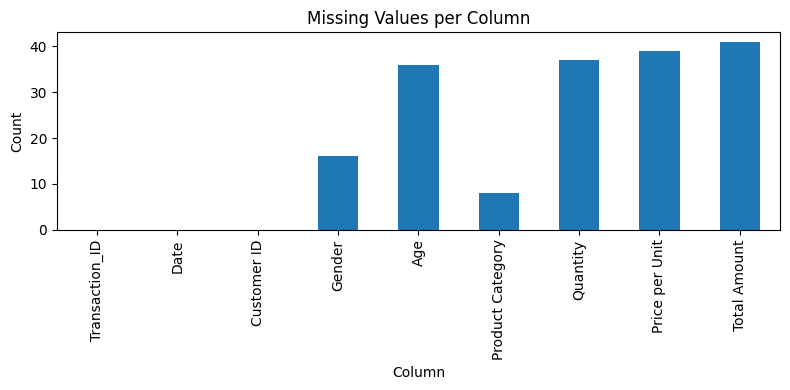

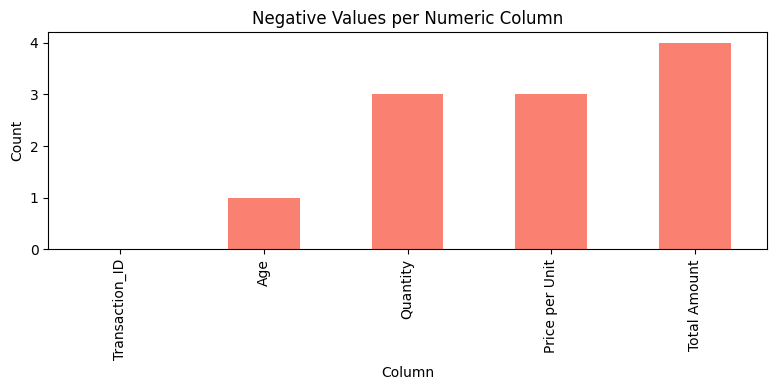

In [16]:
# Bar chart for missing values
if missing_report['nan_count'].sum() > 0:
    missing_report['nan_count'].plot(kind='bar')
    plt.title("Missing Values per Column")
    plt.xlabel("Column"); plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("No missing values to plot.")

# Bar chart for negative values
if negative_report['neg_count'].sum() > 0:
    negative_report['neg_count'].plot(kind='bar', color='salmon')
    plt.title("Negative Values per Numeric Column")
    plt.xlabel("Column"); plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("No negative values to plot.")


=== Number of NaNs per Row ===


,row_count
num_nans,
0,1005
1,3
2,2
3,4
4,23
5,12
6,1


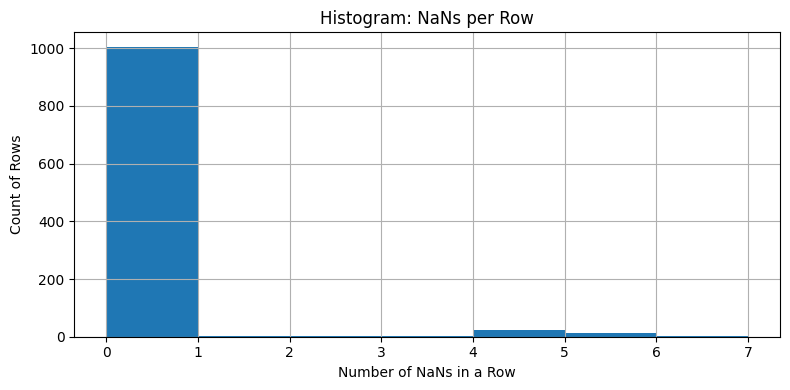

In [17]:
# Only if there are any NaNs
if missing_report['nan_count'].sum() > 0:
    nan_per_row = df.isna().sum(axis=1)
    dist = nan_per_row.value_counts().sort_index()

    print("=== Number of NaNs per Row ===")
    display(dist.rename_axis('num_nans').rename('row_count').to_frame())

    # Histogram
    nan_per_row.hist(bins=range(nan_per_row.max()+2))
    plt.title("Histogram: NaNs per Row")
    plt.xlabel("Number of NaNs in a Row")
    plt.ylabel("Count of Rows")
    plt.tight_layout()
    plt.show()


In [20]:
# Keep track of how many rows we started with
initial_rows = len(df)

# 1) Drop any row that has at least one NaN
df_clean = df.dropna()

# 2) Then drop any row with a negative in a numeric column
df_clean = df_clean[(df_clean[numeric_cols] >= 0).all(axis=1)]

# How many we got removed?
cleaned_rows = len(df_clean)
removed = initial_rows - cleaned_rows

print(f"Initial rows:   {initial_rows}")
print(f"After cleaning: {cleaned_rows}")
print(f"Rows removed:   {removed}")


Initial rows:   1050
After cleaning: 1001
Rows removed:   49


In [11]:
out_path = 'cleaned_salesforce_data.csv'
df_clean.to_csv(out_path, index=False)
print("✅ Cleaned data saved to:", out_path)


✅ Cleaned data saved to: cleaned_salesforce_data.csv
